# Таск №8

## Условие

По заданным значениям x и y построить интерполяционный многочлен в форме Лагранжа

## Описание алгоритма

Для получения функции интерполяции в виде строки необходимо подать на вход точечно-заданную функцию, а именно точки со значениями иксов и игреков. Количество Х-точек и У-точек должно быть одинаковым.

Полная сумма и частичная сумма записываются как строки. Для полной суммы это ноль, так как к ней будут прибавляться частичные суммы. Частичные суммы изначально один, так как они будут умножаться на некоторые выражения.

В цикле проходимся по всем Х-точкам, по формуле считаем частичную сумму так же в цикле. К результату(в начале это 0) прибавляется(записывается как строка) полученная частичная сумма, "умноженная"(как строка) на У-точку. Частичная сумма сбрасывается в единицу для дальнейшего пересчета. Результат возвращается как строка, содержащая математические выражения и "икс".

Для демонстрации результата полученная строковая функция задается как лямбда-функция питона, в которой строковая функция преобразуется в код при помощи eval(). Аргументом для лямбда-функции является икс.

Набор точек для построения графика выбирается как 100 равноотстоящих точек от первой заданной Х-точки до последней заданной Х-точки(поэтому для получения корректного графика задавать Х-точки в порядке возрастания).

Значения функции для построения графика вычисляются в однострочном цикле, в котором значения из полученного набора Х-точек(в коде args) подставляются в лямбда-функцию у. Результат возвращается как список.

В консоль выводится результат как строка(интерполяционная функция), строится график по высчитанным точкам. Для проверки результата на этот же график наносятся входные данные - набор точек, поступивших в качестве аргумента в get_lagranshed_func_as_string(x_dots, y_dots).

0 + 1.469 * 1 * (x - 0.2) / (0 - 0.2) * (x - 0.4) / (0 - 0.4) * (x - 0.6) / (0 - 0.6) * (x - 0.8) / (0 - 0.8) * (x - 1) / (0 - 1) + 1.033 * 1 * (x - 0) / (0.2 - 0) * (x - 0.4) / (0.2 - 0.4) * (x - 0.6) / (0.2 - 0.6) * (x - 0.8) / (0.2 - 0.8) * (x - 1) / (0.2 - 1) + 0.653 * 1 * (x - 0) / (0.4 - 0) * (x - 0.2) / (0.4 - 0.2) * (x - 0.6) / (0.4 - 0.6) * (x - 0.8) / (0.4 - 0.8) * (x - 1) / (0.4 - 1) + 0.261 * 1 * (x - 0) / (0.6 - 0) * (x - 0.2) / (0.6 - 0.2) * (x - 0.4) / (0.6 - 0.4) * (x - 0.8) / (0.6 - 0.8) * (x - 1) / (0.6 - 1) + -0.391 * 1 * (x - 0) / (0.8 - 0) * (x - 0.2) / (0.8 - 0.2) * (x - 0.4) / (0.8 - 0.4) * (x - 0.6) / (0.8 - 0.6) * (x - 1) / (0.8 - 1) + -2.075 * 1 * (x - 0) / (1 - 0) * (x - 0.2) / (1 - 0.2) * (x - 0.4) / (1 - 0.4) * (x - 0.6) / (1 - 0.6) * (x - 0.8) / (1 - 0.8)


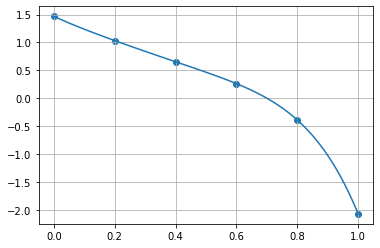

In [12]:
import matplotlib.pyplot as plt
import numpy as np


def get_lagranshed_func_as_string(x_dots, y_dots):
    # результат изначально 0, так как потом к нему будут прибавлятсья
    # частичные суммы
    result = "0"
    # частичная сумма изначально 1, так как она будет умножаться на
    # другие выражения
    part = "1"
    # проходимся по всем Х-точкам, по формуле считаем частичную сумму
    # как строку с подставленными в нее значениями иксов
    for i in range(0, len(x_dots)):
        for j in range(0, len(x_dots)):
            # по формуле, i-тая точка пропускается(чтобы не делить на ноль)
            if i == j:
                continue
            part += f" * (x - {x_dots[j]}) / ({x_dots[i]} - {x_dots[j]})"
        # к результату прибавляется как строка частичная сумма, "умноженная"
        # как строка на У-точку с текущим индексом i
        result += f" + {y_dots[i]} * {part}"
        # сбрасываем частичную сумму в 1 для дальнейшего пересчета
        part = "1"
    return result


# исходные данные: Х-точки
x_dots = [0, .2, .4, .6, .8, 1]
# исходные данные: У-точки
y_dots = [1.469, 1.033, .653, .261, -.391, -2.075]
# результат: интерполяционный многочлен в виде строки(содержащий иксы)
lagranshed_and_stringed_func = get_lagranshed_func_as_string(x_dots, y_dots)
# выводится результат в виде строки: интерполяционный многочлен
print(lagranshed_and_stringed_func)
# результат: интерполяционный многочлен в виде лямбда-функции. Получен
# из предыдущей функции-строки, которая, при помощи eval() преобразована во
# вполне исполняемый код. Аргументом лямбда функции, очевидно, является икс
y = lambda x: eval(lagranshed_and_stringed_func)
# набор точек-аргументов для построения графика. Выбирается как 100
# равноотстоящих точек от первой заданной точки до последней заданной точки
args = np.linspace(x_dots[0], x_dots[len(x_dots) - 1], 100)
# набор точек-значений для построения графика. Получается при помощи цикла, в
# котором подставляются Х-точки из списка args в лямбда-функцию y()
vals = [y(arg) for arg in args]
# сетка на графике для удобства
plt.grid()
# график интерполяционного многочлена
plt.plot(args, vals)
# отмечаем входные данные-точки на полученном графике для проверки результата
plt.scatter(x_dots, y_dots)